In [ ]:
#In this notebook we compute the feature importance of our models and plot Partial Dependence Plots (PDPs)
#We use data without weighted means
#We computed in three different ways: 
#for the scikit learn models we use permutation importance as well as SHAP
#for xgboost from the XgBoost library we use the default plot_importance

In [ ]:
#Have to downgrade numpy because of shap..
#!pip install --upgrade numpy==1.21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.inspection import permutation_importance
import xgboost
import shap
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [2]:
finalx_train_df = pd.read_pickle('./X_train.pickle')
finalx_test_df = pd.read_pickle('./X_test.pickle')
finaly_train_df = pd.read_pickle('./y_train.pickle')
finaly_test_df = pd.read_pickle('./y_test.pickle')
del finalx_train_df['asin']
del finalx_test_df['asin']
del finaly_train_df['asin']
del finaly_test_df['asin']

In [3]:
#Create numpy array out of them
y_train=finaly_train_df.to_numpy()
y_train=y_train[:,0]

In [4]:
y_test=finaly_test_df.to_numpy()
y_test=y_test[:,0]

In [5]:
X_train=finalx_train_df.to_numpy()

In [6]:
X_test=finalx_test_df.to_numpy()

In [7]:
features_names_Og=['cumulative_num_reviews','num_reviews_month','mean_month_rank','revrating_mean','reviewrating_meanverified','cumulative_rating','cumulative_rating_verified','mean_month_price', 'median_month_price','mean_month_est_sales', 'median_month_est_sales']
for i in range(30):
    features_names_Og.append('roll_median_month_rank_'+str(i))

In [8]:
features_names=['cumulative number of reviews','num_reviews_month','monthly mean rank','revrating_mean','reviewrating_meanverified','cumulative_rating','cumulative rating weighted by verification','mean_month_price', 'median_month_price','monthly mean estimated sales', 'monthly median estimated sales']
for i in range(30):
    features_names.append('rolling median rank: day'+str(i))

In [18]:
#We first study the scikit Xgboost model using scikit permutation_importance and then with SHAP
xg_scikit = joblib.load('./OptimizedModels/Xgboost_model_Opt.sav')

In [9]:
perm_importance = permutation_importance(xg_scikit, X_test, y_test)

In [10]:
filename_xgboost = './OptimizedModels/PermImportance_Xgboost.sav'
joblib.dump(perm_importance, filename_xgboost)

['./OptimizedModels/PermImportance_Xgboost.sav']

In [48]:
perm_importance=joblib.load('./OptimizedModels/PermImportance_Xgboost.sav')

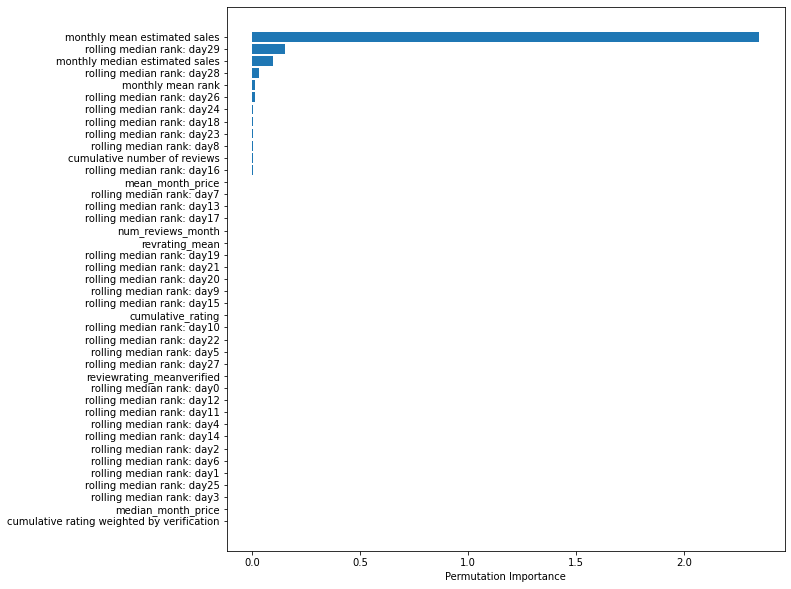

In [49]:
sorted_idx = perm_importance.importances_mean.argsort()
features_names_xg=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(10,10))
plt.barh(features_names_xg, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.savefig('./OptimizedModels/FeatureImportance_Xgboost_Perm.png')

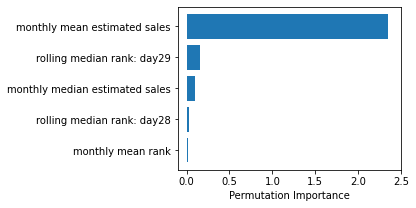

In [50]:
sorted_idx = perm_importance.importances_mean.argsort()
features_names_xg=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(4,3))
sortindex5=sorted_idx[-5:]
plt.barh(features_names_xg[-5:], perm_importance.importances_mean[sortindex5])
plt.xlim(-0.1,2.5)
plt.xlabel("Permutation Importance")
plt.savefig('./OptimizedModels/FeatureImportance_Xgboost_Perm_LessFeatures.png')

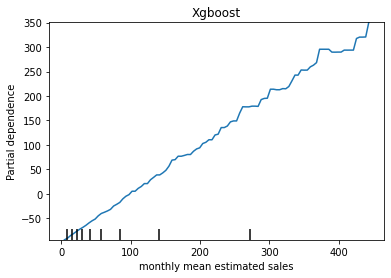

In [53]:
idx=features_names_Og.index('mean_month_est_sales')
#Partial dependence plot for mean_month_est_sales
PartialDependenceDisplay.from_estimator(xg_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for the mean of estimated sales in a month')
plt.title('Xgboost')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Xgboost_MeanMonthEstSales.png')

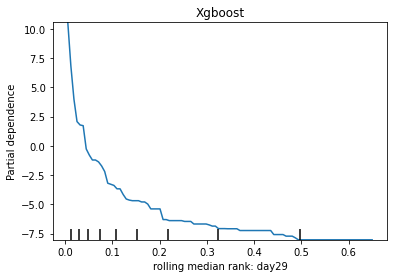

In [55]:
idx=features_names_Og.index('roll_median_month_rank_29')
#Partial dependence plot for roll_median_month_rank_29
PartialDependenceDisplay.from_estimator(xg_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost for rolling median rank of day 29 in a month')
plt.title('Xgboost')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Xgboost_RollMedian29.png')

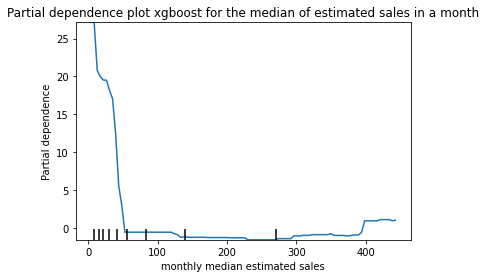

In [56]:
idx=features_names_Og.index('median_month_est_sales')
#Partial dependence plot for mean_month_est_sales
PartialDependenceDisplay.from_estimator(xg_scikit, X_test, features=[idx], feature_names=features_names)
plt.title('Partial dependence plot xgboost for the median of estimated sales in a month')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Xgboost_MedianMonthEstSales.png')

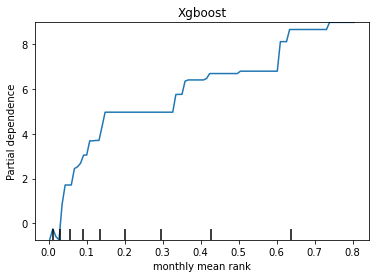

In [59]:
idx=features_names_Og.index('mean_month_rank')
#Partial dependence plot for mean_month_rank
PartialDependenceDisplay.from_estimator(xg_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost mean month rank')
plt.title('Xgboost')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Xgboost_MeanMonthRank.png')

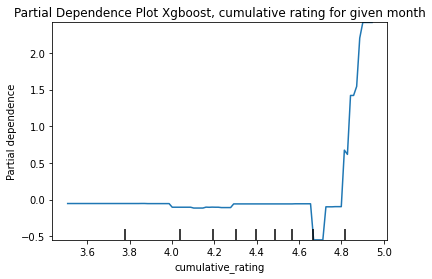

In [15]:
idx=features_names.index('cumulative_rating')
#Partial dependence plot for cumulative_rating i.e. the total rating of a given month
PartialDependenceDisplay.from_estimator(xg_scikit, X_test, features=[idx], feature_names=features_names)
plt.title('Partial dependence plot xgboost cumulative rating for given month')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Xgboost_CumulativeRating.png')

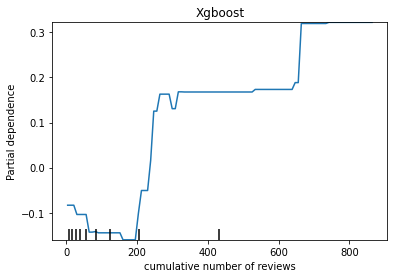

In [60]:
idx=features_names_Og.index('cumulative_num_reviews')
#Partial dependence plot for cumulative_num_reviews, i.e. total number of reviews for a given month
PartialDependenceDisplay.from_estimator(xg_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot xgboost cumulative number of reviews for given month')
plt.title('Xgboost')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Xgboost_CumulativeNumReviews.png')

In [ ]:
#Now with SHAP (ignore for now because takes really long)
#explainer = shap.Explainer(xg_scikit)
#shap_values = explainer.shap_values(X_test)

In [ ]:
#fig1=shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", show=False)
#plt.savefig('./OptimizedModels/FeatureImportance_Xgboost_Shap1.png')

In [ ]:
#fig2=shap.summary_plot(shap_values, features=X_test, feature_names=feature_names, show=False)
#plt.savefig('./OptimizedModels/FeatureImportance_Xgboost_Shap2.png')

In [9]:
#Now we focus on the Forest Model using scikit permutation_importance (not with SHAP because too long)
forest_scikit = joblib.load('./OptimizedModels/Randomforest_model_Opt.sav')

In [19]:
perm_importance = permutation_importance(forest_scikit, X_test, y_test)

KeyboardInterrupt: 

In [ ]:
filename_forest = './OptimizedModels/PermImportance_Forest.sav'
joblib.dump(perm_importance, filename_forest)

In [10]:
perm_importance=joblib.load('./OptimizedModels/PermImportance_Forest.sav')

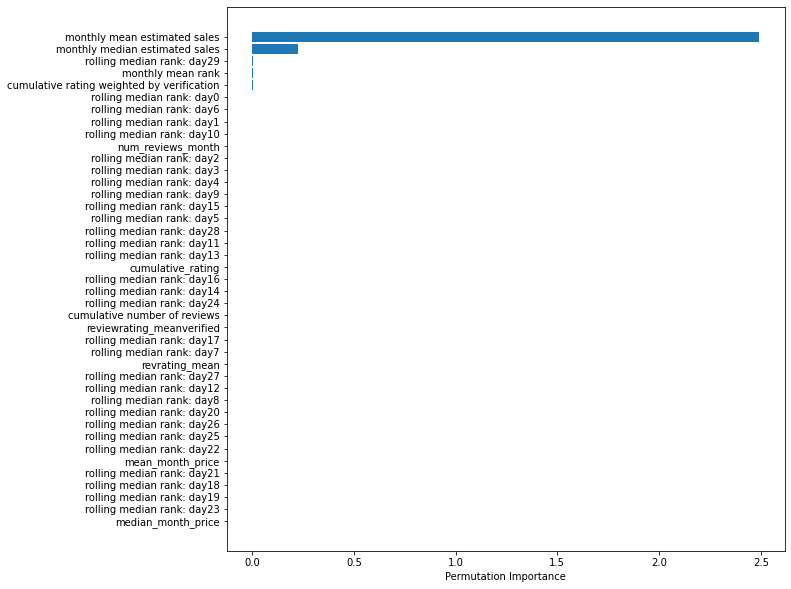

In [11]:
sorted_idx = perm_importance.importances_mean.argsort()
feature_names_forest=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(10,10))
plt.barh(feature_names_forest, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.savefig('./OptimizedModels/FeatureImportance_Randomforest_Perm.png')

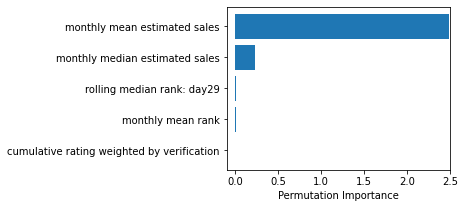

In [65]:
sorted_idx = perm_importance.importances_mean.argsort()
features_names_xg=[features_names[i] for i in sorted_idx]
plt.figure(figsize=(4,3))
sortindex5=sorted_idx[-5:]
plt.barh(features_names_xg[-5:], perm_importance.importances_mean[sortindex5])
plt.xlim(-0.1,2.5)
plt.xlabel("Permutation Importance")
plt.savefig('./OptimizedModels/FeatureImportance_Forest_Perm_LessFeatures.png')

In [ ]:
#Now with SHAP
#explainer = shap.Explainer(forest_scikit)
#shap_values = explainer.shap_values(X_test)

In [ ]:
#fig3=shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", show=False)
#plt.savefig('./OptimizedModels/FeatureImportance_Forest_Shap1.png')

In [ ]:
#fig4=shap.summary_plot(shap_values, features=X_test, feature_names=feature_names, show=False)
#plt.savefig('./OptimizedModels/FeatureImportance_Forest_Shap2.png')

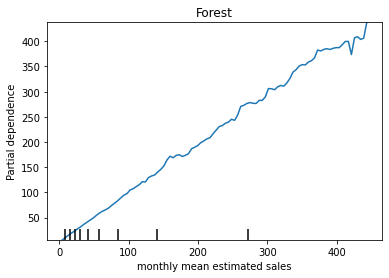

In [66]:
idx=features_names_Og.index('mean_month_est_sales')
#Partial dependence plot for mean_month_est_sales
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot forest for the mean of estimated sales in a month')
plt.title('Forest')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Forest_MeanMonthEstSales.png')

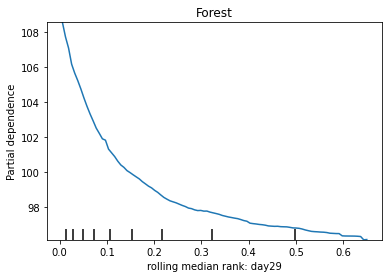

In [72]:
idx=features_names_Og.index('roll_median_month_rank_29')
#Partial dependence plot for roll_median_month_rank_29
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot forest for rolling median rank of day 29 in a month')
plt.title('Forest')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Forest_RollMedian29.png')

In [ ]:
idx=features_names.index('median_month_est_sales')
#Partial dependence plot for mean_month_est_sales
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
plt.title('Partial dependence plot forest for the median of estimated sales in a month')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Forest_MedianMonthEstSales.png')

In [ ]:
idx=features_names.index('mean_month_rank')
#Partial dependence plot for mean_month_rank
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
plt.title('Partial Dependence Plot Forest mean month rank')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Forest_MeanMonthRank.png')

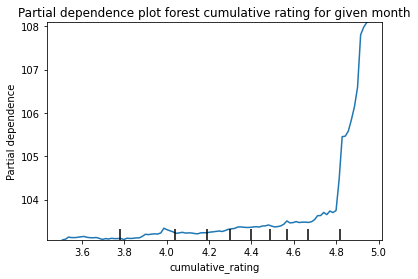

In [76]:
idx=features_names.index('cumulative_rating')
#Partial dependence plot for cumulative_rating i.e. the total rating of a given month
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
plt.title('Partial dependence plot forest cumulative rating for given month')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Forest_CumulativeRating.png')

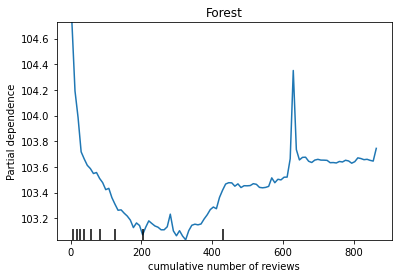

In [12]:
idx=features_names.index('cumulative number of reviews')
#Partial dependence plot for cumulative_num_reviews, i.e. total number of reviews for a given month
PartialDependenceDisplay.from_estimator(forest_scikit, X_test, features=[idx], feature_names=features_names)
#plt.title('Partial dependence plot forest cumulative number of reviews for given month')
plt.title('Forest')
plt.savefig('./OptimizedModels/Partial_Dependence_Plots/PartialDepPlot_Forest_CumulativeNumReviews.png')